# Underwriting Risk Model with visualizations

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# Load Dataset

In [3]:
df = pd.read_csv("insurance.csv")


# Assign risk levels based on charges

In [5]:
def assign_risk(charge):
    if charge > 30000:
        return 'High'
    elif charge > 15000:
        return 'Medium'
    else:
        return 'Low'
df['risk']=df['charges'].apply(assign_risk)

# Encode categorical features

In [6]:
le_sex = LabelEncoder()
le_smoker = LabelEncoder()
le_region = LabelEncoder()
le_risk = LabelEncoder()

df['sex'] = le_sex.fit_transform(df['sex'])
df['smoker'] = le_smoker.fit_transform(df['smoker'])
df['region'] = le_region.fit_transform(df['region'])
df['risk_encoded'] = le_risk.fit_transform(df['risk'])

# Visualization 1: Risk Distribution

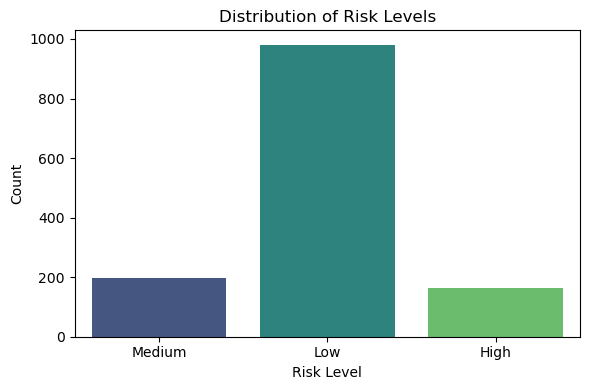

In [16]:
plt.figure(figsize=(6, 4))
sns.countplot(x='risk', data=df, palette='viridis')
plt.title("Distribution of Risk Levels")
plt.xlabel("Risk Level")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Visualization 2: Risk vs Smoker

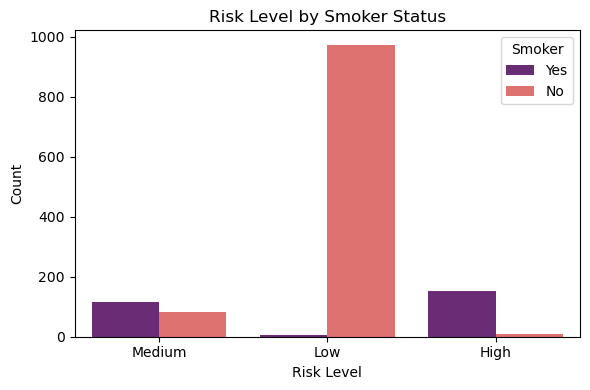

In [17]:
plt.figure(figsize=(6, 4))
sns.countplot(x='risk', hue='smoker', data=df.replace({'smoker': {0: 'No', 1: 'Yes'}}), palette='magma')
plt.title("Risk Level by Smoker Status")
plt.xlabel("Risk Level")
plt.ylabel("Count")
plt.legend(title="Smoker")
plt.tight_layout()
plt.show()


# Visualization 3: Charges by Risk

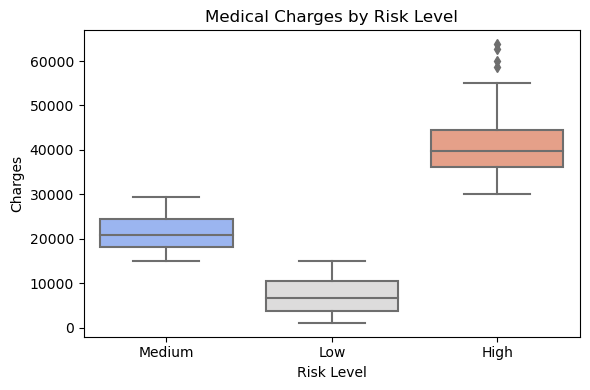

In [18]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='risk', y='charges', data=df, palette='coolwarm')
plt.title("Medical Charges by Risk Level")
plt.xlabel("Risk Level")
plt.ylabel("Charges")
plt.tight_layout()
plt.show()

# Define features and target

In [19]:
x=df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y=df['risk_encoded']

# Trian-test split 

In [22]:
x_train,x_test,y_train,y_test = train_test_split (x,y,test_size=0.25,random_state=42)

# Train model

In [23]:
model = RandomForestClassifier(random_state=42,class_weight='balanced')
model.fit(x_train,y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

# Predict


In [27]:
y_pred=model.predict(x_test)

# Classification report

In [28]:
all_class_indices = [0,1,2]
all_class_names = le_risk.inverse_transform(all_class_indices)

report = classification_report(
    y_test,y_pred,
    labels=all_class_indices,
    target_names=all_class_indices,
    output_dict=True,
    zero_division=0
)
df_report = pd.DataFrame(report).transpose()
print("Underwriting Risk Classification Report:\n")
print(df_report)

Underwriting Risk Classification Report:

              precision    recall  f1-score     support
0              0.950000  0.904762  0.926829   42.000000
1              0.917603  0.995935  0.955166  246.000000
2              0.892857  0.531915  0.666667   47.000000
accuracy       0.919403  0.919403  0.919403    0.919403
macro avg      0.920153  0.810871  0.849554  335.000000
weighted avg   0.918193  0.919403  0.911137  335.000000


In [30]:
from sklearn.model_selection import train_test_split

# Features and target
X = df.drop(['risk', 'risk_encoded'], axis=1)  
y = df['risk_encoded']  # Use encoded risk values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [31]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

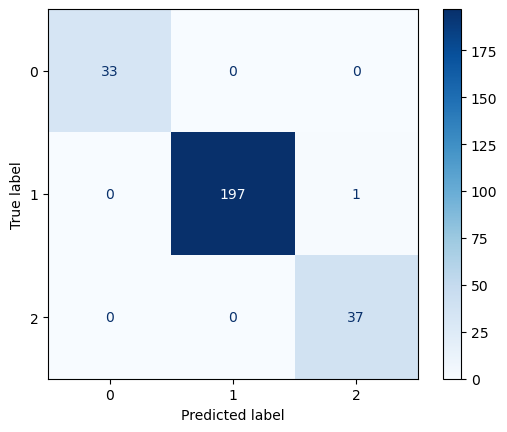

In [32]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap="Blues")


In [33]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      0.99      1.00       198
           2       0.97      1.00      0.99        37

    accuracy                           1.00       268
   macro avg       0.99      1.00      0.99       268
weighted avg       1.00      1.00      1.00       268



In [34]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5)
print("Cross-validated accuracy:", scores.mean())



Cross-validated accuracy: 0.9947761194029852


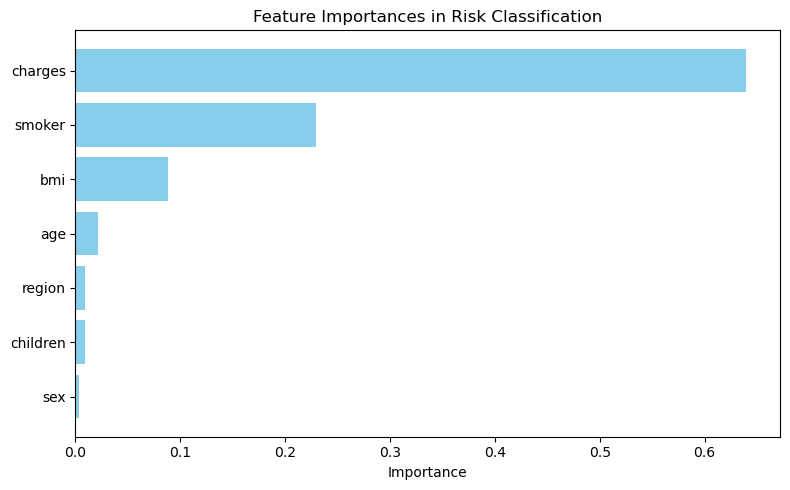

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

importances = model.feature_importances_
features = X.columns
feat_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_df = feat_df.sort_values('Importance', ascending=False)

plt.figure(figsize=(8, 5))
plt.barh(feat_df['Feature'], feat_df['Importance'], color='skyblue')
plt.xlabel("Importance")
plt.title("Feature Importances in Risk Classification")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
